In [1]:
import matplotlib.pyplot as plt
from freegs.machine import Coil, Solenoid, Machine, Wall
from freegs.jtor import ConstrainBetapIp
from freegs.equilibrium import Equilibrium
from freegs.control import constrain
from freegs import solve
from Geometry import * 

In [2]:
# Global configurations

# Plasma Parameters
Ip = 10e3 # A
poloidal_plasma_beta = 0.5
xpoints = [(0.3, -0.24), (0.3, 0.24)]  # (R,Z) locations of X-points
isoflux = [(0.3, -0.24, 0.3, 0.24)] # (R1,Z1, R2,Z2) pairs

# Central Solenoid
cs_turns = 104 # Turns

# Dimension of coils
wc = 0.05
hc = 0.03

# Position of coils in (R, Z) pairs for coils located at (R, Z) and (R, -Z)
mirrored_PF_coils_positions = [
    (0.22, 0.3),
    # (0.40, 0.27),
    (0.52, 0.15)
]

# Other
B0 = 0.125

# Simulation Domain
Rmax = 0.7
Rmin = 0.1
Zmax = 0.6
Zmin = 0.6
n = 129           # Number of grid points (must always be in the for

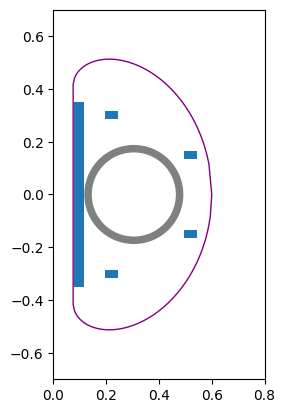

In [3]:
g = Geometry()

for index, (r, z) in enumerate(mirrored_PF_coils_positions):
    g.create_coil(f'PF{index}_U',r, z, wc, hc)
    g.create_coil(f'PF{index}_L',r, -z, wc, hc)

g.plot()

In [4]:
coils = [ (name, Coil(prop['r0'], prop['z0'], control=(name != 'CS'))) for name, prop in g.geom['coils'].items()]
RWall, ZWall = list(zip(*g.geom['vv'][0])) 
walls = Wall(RWall, ZWall) 
tokamak = Machine(coils, walls)
for coil_name, _ in tokamak.coils:
    if coil_name != 'CS':
        tokamak[coil_name].area = wc * hc
eq = Equilibrium(tokamak=tokamak,
                 Rmin=0.01, Rmax=0.7,  # Radial domain
                 Zmin=-0.6, Zmax=0.6,  # Height range
                 nx=129, ny=129  # Number of grid points
                 )
profiles = ConstrainBetapIp(eq,
                            poloidal_plasma_beta,  # Plasma poloidal beta
                            Ip,  # Plasma current [Amps]
                            g.vv_major_radius * B0)  # Vacuum f=R*Bt

constraints = constrain(xpoints=xpoints, isoflux=isoflux)

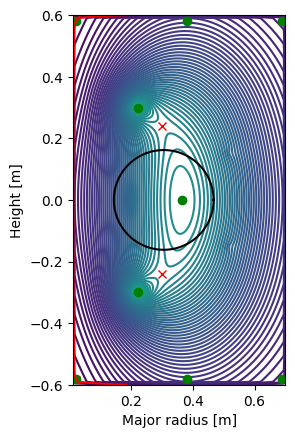

psi_relchange: 0.5270794123518054
bndry_relchange: 1.0
bndry_change: -0.2149179093856404


psi_relchange: 0.920239989654949
bndry_relchange: 184153.07249019912
bndry_change: 0.21491674233075814


psi_relchange: 0.3699908002207989
bndry_relchange: 0.9997248442286756
bndry_change: -0.0042402663580225


psi_relchange: 0.9993864786062168
bndry_relchange: 1.8768085032055315
bndry_change: 0.002767079660064175


psi_relchange: 0.33502090306159665
bndry_relchange: 0.9997775931346066
bndry_change: -6.627609466264311


psi_relchange: 0.9993864782701922
bndry_relchange: 4513.637652224585
bndry_change: 6.627615466556548


psi_relchange: 0.33502094969236346
bndry_relchange: 0.9997775924864745
bndry_change: -6.600617328484925


psi_relchange: 0.9993864786142949
bndry_relchange: 4476.984772153364
bndry_change: 6.600611338905552


psi_relchange: 0.3350209225980855
bndry_relchange: 0.9997775931580574
bndry_change: -6.62756200808467


psi_relchange: 0.9993864782708038
bndry_relchange: 4513.605302645165


RuntimeError: Picard iteration failed to converge (too many iterations)

In [33]:
solve(eq,
      profiles,
      constraints,
      check_limited=True,
      limit_it = 0,
      show=True
      )